In [6]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd
import seaborn as sns
%matplotlib inline

In [3]:
#Example Case:
#You have 25 students in a classroom, and assign a project.
#The project has 2 major components, and each student gets a grade
#for each component.
#Estimate the likelihood that a student will receive a A on both components.
#For this example, an A is a 90% or higher.

#Step 1: Describe what you're measuring.
#In this case, we are examining a binary outcome: either students receive an A,
#or they don't. 




/usr/local/anaconda3-4.4.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


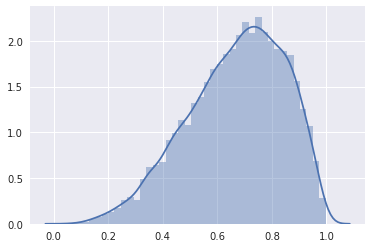

In [56]:
#Step 2: Use your intuition or past experience to identify the likelihood
#of an A occuring on each component.  For example, in past assignments 20% 
#of students received an A.

#Step 3: Based on step 2, select a distribution that approximates your intuition 
#or findings.
beta_ex = np.random.beta(4,2,size=10000)
sns.distplot(beta_ex)

In [57]:
#Step 4: Construct a model based on your distribution(s) that results in
#the binary outcome you identified in step 1.
score = (np.random.beta(4,2)>0.90) + (np.random.beta(4,2)>0.90)
print(score)

0


In [66]:
#5 Now, simulate your model and save your results.
results_df = pd.DataFrame()
number_of_sims = 10000

count =  0

while count < number_of_sims:
    score = (np.random.beta(4,2)>0.90) + (np.random.beta(4,2)>0.90)
    if(score == 2):
        both_a = 1
    else:
        both_a = 0
    results_df = results_df.append({"Both_A":both_a}, ignore_index=True)
    count = count + 1

0.007


/usr/local/anaconda3-4.4.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


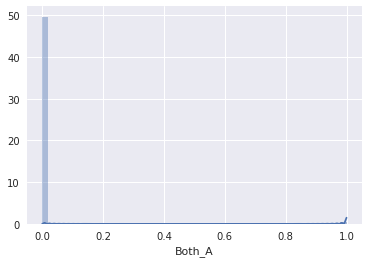

In [67]:
#6 And, examine your results:
sns.distplot(results_df["Both_A"])
print(results_df["Both_A"].mean())

0.1741


/usr/local/anaconda3-4.4.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


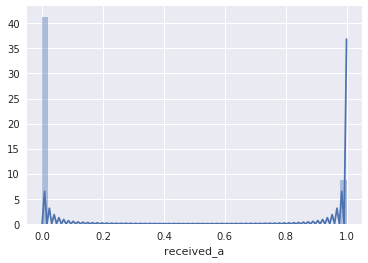

In [83]:
#finally, you can re-run step 5 and 6 multiple times.
#If you have enough simulations, the solution you find 
#should not change much.  I.e., in this case about .07%
#of the time a student would receive an A on both components.

#Why is this so low compared to a more realistic simulation?
# - Students who do well on one component will likely do well
# on another.  We have no "autocorrelation" in our model - 
# i.e., both components are chosen entirely randomly.

# - It is possible a students average grade would be an A,
# even if both components are not.  

#Here is what a more complex model (though still simple) might look like incorporating
#those two ideas:

results_df = pd.DataFrame()
number_of_sims = 10000

count =  0

while count < number_of_sims:
    score_1 = np.random.beta(4,2)
    score_2 = ((1 - score_1) * np.random.beta(4,2)) + score_1
    a_grade = (score_1 + score_2) 
    if(a_grade > 1.8):
        received_a = 1
    else:
        received_a = 0
    
    results_df = results_df.append({"received_a":received_a}, ignore_index=True)
    count = count + 1
    
sns.distplot(results_df["received_a"])
print(results_df["received_a"].mean())

#Under these assumptions, around 17% of the class would receive an A,
#even though only .07% would receive an A on both components.